In [2]:
import glob
import os
import pandas as pd
import re
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
import sklearn.preprocessing as preproc
import sklearn.linear_model as lm
import sklearn.pipeline
from sklearn import decomposition
from scipy.optimize import least_squares
from IPython.display import Image
import geopandas as gpd
from requests import get,Session
import wget
%matplotlib inline

NameError: name 'gdf' is not defined

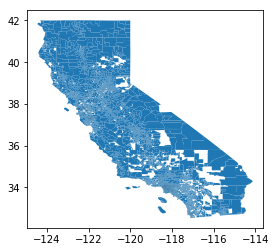

In [3]:
gdf_g16_shp = gpd.read_file('data/SWDB/srprec_state_g16_v01_shp/srprec_state_g16_v01.shp')
gdf_g16_shp.plot()

In [4]:
gdf_g16_shp

,ID,AREA,DATA,ELECTION,TYPE,COUNTY,SRPREC_KEY,SRPREC,geometry
0,57892,261.898945,19281,g16,srprec,06037,060375960001A,5960001A,"POLYGON ((-118.675941 33.015421, -118.678551 3..."
1,57906,94.996005,19344,g16,srprec,06037,060376210002A,6210002A,"(POLYGON ((-118.451647 33.367972, -118.45159 3..."
2,57932,196.070413,19343,g16,srprec,06037,060376210001A,6210001A,"(POLYGON ((-118.451647 33.367972, -118.451726 ..."
3,57962,2.432190,16929,g16,srprec,06037,060370500001A,0500001A,"POLYGON ((-118.330607 33.355493, -118.329968 3..."
4,57977,0.715654,16930,g16,srprec,06037,060370500003A,0500003A,"POLYGON ((-118.342787 33.338974, -118.342813 3..."
5,57994,0.290400,11714,g16,srprec,06059,0605944128,44128,"POLYGON ((-117.795496 33.545353, -117.795713 3..."
6,58012,0.171761,11720,g16,srprec,06059,0605944142,44142,"POLYGON ((-117.795496 33.545353, -117.795651 3..."
7,58031,0.117114,11713,g16,srprec,06059,0605944126,44126,"POLYGON ((-117.7928 33.54649, -117.79176 33.54..."
8,58049,0.164826,11718,g16,srprec,06059,0605944136,44136,"POLYGON ((-117.787984 33.549252, -117.787531 3..."
9,58067,0.238472,11721,g16,srprec,06059,0605944150,44150,"POLYGON ((-117.76295 33.519173, -117.763157 33..."


In [5]:
gdf_g16_sov = gpd.read_file('data/SWDB/state_g16_sov_data_by_g16_srprec/state_g16_sov_data_by_g16_srprec.dbf')
gdf_g16_sov

,ELECTION,TYPE,COUNTY,FIPS,SRPREC_KEY,SRPREC,ADDIST,CDDIST,SDDIST,BEDIST,...,PRSLIB01,PRSPAF01,PRSREP01,SENDEM01,SENDEM02,SENLIB01,SENREP01,USSDEM01,USSDEM02,geometry
0,g16,sov,19,06037,06037CNTYTOT,CNTYTOT,261836,172115,134531,13538,...,88968,21993,769743,775882,135353,48316,362713,1895675,1218236,None
1,g16,sov,37,06073,06073CNTYTOT,CNTYTOT,165740,110982,83486,8700,...,51663,3353,477766,258686,0,0,155053,625843,446063,None
2,g16,sov,30,06059,06059CNTYTOT,CNTYTOT,106073,69724,52401,6164,...,46128,4898,507148,293085,0,0,345925,555459,486783,None
3,g16,sov,33,06065,06065CNTYTOT,CNTYTOT,66065,44691,31230,4504,...,24089,3433,333243,214757,0,0,174429,339497,281437,None
4,g16,sov,1,06001,06001CNTYTOT,CNTYTOT,21262,16519,10490,2314,...,16906,3162,95922,236793,115960,0,32991,443536,144134,None
5,g16,sov,36,06071,06071CNTYTOT,CNTYTOT,71892,34552,37569,3933,...,21048,3785,271225,164737,0,0,206216,300738,251246,None
6,g16,sov,43,06085,06085CNTYTOT,CNTYTOT,28526,19339,15117,2126,...,25325,2759,144826,349209,117442,0,59401,411765,207380,None
7,g16,sov,34,06067,06067CNTYTOT,CNTYTOT,5664,4581,3631,719,...,24412,2556,189789,31205,1195,0,47053,312038,161673,None
8,g16,sov,7,06013,06013CNTYTOT,CNTYTOT,9292,6782,4614,1312,...,16123,1566,115956,281978,49641,0,102131,282587,124731,None
9,g16,sov,38,06075,06075CNTYTOT,CNTYTOT,10651,7313,6567,1194,...,8883,1799,37688,190618,182192,0,0,286723,80985,None


In [6]:
gdf_g16_sov.columns

Index(['ELECTION', 'TYPE', 'COUNTY', 'FIPS', 'SRPREC_KEY', 'SRPREC', 'ADDIST',
       'CDDIST', 'SDDIST', 'BEDIST', 'TOTREG', 'DEMREG', 'REPREG', 'AIPREG',
       'GRNREG', 'LIBREG', 'NLPREG', 'REFREG', 'DCLREG', 'MSCREG', 'TOTVOTE',
       'DEMVOTE', 'REPVOTE', 'AIPVOTE', 'GRNVOTE', 'LIBVOTE', 'NLPVOTE',
       'REFVOTE', 'DCLVOTE', 'MSCVOTE', 'PRCVOTE', 'ABSVOTE', 'ASSDEM01',
       'ASSDEM02', 'ASSIND01', 'ASSLIB01', 'ASSREP01', 'ASSREP02', 'CNGDEM01',
       'CNGDEM02', 'CNGIND01', 'CNGREP01', 'PR_51_N', 'PR_51_Y', 'PR_52_N',
       'PR_52_Y', 'PR_53_N', 'PR_53_Y', 'PR_54_N', 'PR_54_Y', 'PR_55_N',
       'PR_55_Y', 'PR_56_N', 'PR_56_Y', 'PR_57_N', 'PR_57_Y', 'PR_58_N',
       'PR_58_Y', 'PR_59_N', 'PR_59_Y', 'PR_60_N', 'PR_60_Y', 'PR_61_N',
       'PR_61_Y', 'PR_62_N', 'PR_62_Y', 'PR_63_N', 'PR_63_Y', 'PR_64_N',
       'PR_64_Y', 'PR_65_N', 'PR_65_Y', 'PR_66_N', 'PR_66_Y', 'PR_67_N',
       'PR_67_Y', 'PRSDEM01', 'PRSGRN01', 'PRSLIB01', 'PRSPAF01', 'PRSREP01',
       'SENDEM01', 'S

In [13]:
gdf_g16_sov['LIBVOTE']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
23793    0
23794    0
23795    0
23796    0
23797    0
23798    0
23799    0
23800    0
23801    0
23802    0
23803    0
23804    0
23805    0
23806    0
23807    0
23808    0
23809    0
23810    0
23811    0
23812    0
23813    0
23814    0
23815    0
23816    0
23817    0
23818    0
23819    0
23820    0
23821    0
23822    0
Name: LIBVOTE, Length: 23823, dtype: int64

In [14]:
gdf_g16_sor = gpd.read_file('data/SWDB/state_g16_registration_by_g16_srprec/state_g16_registration_by_g16_srprec.dbf')
gdf_g16_sor

,ELECTION,TYPE,FIPS,SRPREC_KEY,SRPREC,TOTREG_R,DEM,REP,AIP,PAF,...,OREG1G,OREG2G,OREG3G,OREG4G,OREG5G,OREG6G,OREG7G,OREG8G,OREG9G,geometry
0,g16,R,06001,06001200100,200100,760,548,38,6,0,...,11,2,2,1,2,1,2,0,4,None
1,g16,R,06001,06001200200,200200,711,516,34,10,5,...,6,4,5,2,2,0,0,2,9,None
2,g16,R,06001,06001200300,200300,584,409,25,4,2,...,7,1,1,2,2,0,1,1,3,None
3,g16,R,06001,06001200600,200600,658,480,21,7,1,...,7,3,1,3,3,1,2,1,7,None
4,g16,R,06001,06001200700,200700,682,498,19,6,0,...,12,2,2,0,2,0,2,0,3,None
5,g16,R,06001,06001200800,200800,641,460,33,4,1,...,5,1,3,2,0,1,2,1,11,None
6,g16,R,06001,06001201000,201000,638,471,35,4,1,...,7,3,1,2,0,1,2,3,0,None
7,g16,R,06001,06001201100,201100,682,502,21,8,0,...,5,2,2,2,1,0,3,0,4,None
8,g16,R,06001,06001201300,201300,669,503,14,3,3,...,7,2,2,0,4,0,2,0,6,None
9,g16,R,06001,06001201400,201400,711,530,26,4,1,...,7,0,1,2,1,0,1,1,5,None


In [15]:
merge_sov_sor = pd.merge(left=gdf_g16_sor,right=gdf_g16_sov,on='SRPREC_KEY',how='outer',indicator=True)
merge_sov_sor

,ELECTION_x,TYPE_x,FIPS_x,SRPREC_KEY,SRPREC_x,TOTREG_R,DEM,REP,AIP,PAF,...,PRSPAF01,PRSREP01,SENDEM01,SENDEM02,SENLIB01,SENREP01,USSDEM01,USSDEM02,geometry_y,_merge
0,g16,R,06001,06001200100,200100,760.0,548.0,38.0,6.0,0.0,...,0.0,32.0,490.0,88.0,0.0,0.0,535.0,79.0,None,both
1,g16,R,06001,06001200200,200200,711.0,516.0,34.0,10.0,5.0,...,1.0,27.0,453.0,92.0,0.0,0.0,501.0,84.0,None,both
2,g16,R,06001,06001200300,200300,584.0,409.0,25.0,4.0,2.0,...,0.0,27.0,348.0,86.0,0.0,0.0,388.0,75.0,None,both
3,g16,R,06001,06001200600,200600,658.0,480.0,21.0,7.0,1.0,...,0.0,24.0,423.0,86.0,0.0,0.0,467.0,69.0,None,both
4,g16,R,06001,06001200700,200700,682.0,498.0,19.0,6.0,0.0,...,1.0,22.0,409.0,107.0,0.0,0.0,469.0,71.0,None,both
5,g16,R,06001,06001200800,200800,641.0,460.0,33.0,4.0,1.0,...,1.0,19.0,409.0,86.0,0.0,0.0,444.0,67.0,None,both
6,g16,R,06001,06001201000,201000,638.0,471.0,35.0,4.0,1.0,...,1.0,28.0,416.0,82.0,0.0,0.0,443.0,69.0,None,both
7,g16,R,06001,06001201100,201100,682.0,502.0,21.0,8.0,0.0,...,0.0,20.0,427.0,98.0,0.0,0.0,480.0,57.0,None,both
8,g16,R,06001,06001201300,201300,669.0,503.0,14.0,3.0,3.0,...,3.0,14.0,392.0,109.0,0.0,0.0,454.0,68.0,None,both
9,g16,R,06001,06001201400,201400,711.0,530.0,26.0,4.0,1.0,...,1.0,19.0,438.0,105.0,0.0,0.0,484.0,67.0,None,both


In [22]:
merge_sov_sor.query('_merge == "right_only" & SRPREC_y != "CNTYTOT"')['PR_51_Y'].sum()

1519.0

In [25]:
for col in gdf_g16_sor.columns: print(col)

ELECTION
TYPE
FIPS
SRPREC_KEY
SRPREC
TOTREG_R
DEM
REP
AIP
PAF
MSC
LIB
NLP
GRN
REF
DCL
MALE
FEMALE
HISPDEM
HISPREP
HISPDCL
HISPOTH
JEWDEM
JEWREP
JEWDCL
JEWOTH
KORDEM
KORREP
KORDCL
KOROTH
JPNDEM
JPNREP
JPNDCL
JPNOTH
CHIDEM
CHIREP
CHIDCL
CHIOTH
INDDEM
INDREP
INDDCL
INDOTH
VIETDEM
VIETREP
VIETDCL
VIETOTH
FILDEM
FILREP
FILDCL
FILOTH
DEMMUNK
DEMM1824
DEMM2534
DEMM3544
DEMM4554
DEMM5564
DEMM65PL
DEMFUNK
DEMF1824
DEMF2534
DEMF3544
DEMF4554
DEMF5564
DEMF65PL
REPMUNK
REPM1824
REPM2534
REPM3544
REPM4554
REPM5564
REPM65PL
REPFUNK
REPF1824
REPF2534
REPF3544
REPF4554
REPF5564
REPF65PL
DCLMUNK
DCLM1824
DCLM2534
DCLM3544
DCLM4554
DCLM5564
DCLM65PL
DCLFUNK
DCLF1824
DCLF2534
DCLF3544
DCLF4554
DCLF5564
DCLF65PL
OTHMUNK
OTHM1824
OTHM2534
OTHM3544
OTHM4554
OTHM5564
OTHM65PL
OTHFUNK
OTHF1824
OTHF2534
OTHF3544
OTHF4554
OTHF5564
OTHF65PL
DREG1G
DREG2G
DREG3G
DREG4G
DREG5G
DREG6G
DREG7G
DREG8G
DREG9G
RREG1G
RREG2G
RREG3G
RREG4G
RREG5G
RREG6G
RREG7G
RREG8G
RREG9G
IREG1G
IREG2G
IREG3G
IREG4G
IREG5G
IREG6G
IREG7G

In [ ]:
#gdf_test = gdf_test[gdf_test['SRPREC'] != 'CNTYTOT']

In [ ]:
#len(gdf[gdf['SRPREC'] == 'UNASSIGN'])

In [ ]:
#gdf['COUNTY_COD']='06'+gdf['COUNTY']
#gdf

In [ ]:
#result = pd.merge(left=gdf,right=gdf_test,on=['COUNTY_COD','SRPREC'],how='inner',sort=True)
#result

In [ ]:
#result.geometry = result.geometry_x

In [ ]:
#result.plot(column='TOTREG')

In [ ]:
#gdf_test

In [26]:
gdf_test = gpd.read_file('/Users/nehrkorn/Downloads/state_g08_sr_blk_map.dbf')

In [34]:
gdf_test

,COUNTY_COD,SRPREC_KEY,SRPREC,TRACT,BLOCK,BLKREG,SRTOTREG,PCTSRPREC,BLKTOTREG,PCTBLK,geometry
0,06001,06001,,425100,2012,1,0,0.000,101,0.990,None
1,06001,06001200100,200100,404400,1000,5,752,0.665,209,2.392,None
2,06001,06001200100,200100,421100,1000,109,752,14.495,118,92.373,None
3,06001,06001200100,200100,421100,1001,41,752,5.452,45,91.111,None
4,06001,06001200100,200100,421100,1002,19,752,2.527,75,25.333,None
5,06001,06001200100,200100,421100,1005,56,752,7.447,56,100.000,None
6,06001,06001200100,200100,421100,1006,92,752,12.234,92,100.000,None
7,06001,06001200100,200100,421100,2000,18,752,2.394,18,100.000,None
8,06001,06001200100,200100,421100,2001,107,752,14.229,112,95.536,None
9,06001,06001200100,200100,421100,2002,47,752,6.250,111,42.342,None


In [36]:
gdf_test['SRPREC_KEY'].value_counts()

060935003        789
06071973002      548
06009310         489
06071131004      443
06025483021      438
060190000882     382
06051007         375
060071808        374
06079M6          370
06049500         349
06071853003      347
060290001990     345
060932014        327
06009510         315
060290003450     313
06071131003      309
06071851001      292
06071853006      291
06025586008      291
060290001991     289
060371750055A    284
06045300008      284
06071131005      283
060770011108     279
06107804         277
06071101001      277
060931007        274
060290001281     274
06031205         267
06071973014      262
                ... 
061114022          1
060190001090       1
0605925237         1
06045999549        1
060130009120       1
0606544001         1
0605944901         1
0606545923         1
060019394200       1
061113210          1
060190001014       1
06045999545        1
06107815           1
060311528          1
06035MB35          1
060130009124       1
060853988    